# <u>TIKTOK PROJECT</u>  
### FIRST OBJECTIVE:  
Conduct A Two Sample T-Test On The Relationship Between The Video View Counts Of Verified And Not Verified Users  

### SECOND OBJECTIVE:  
Build A Regression Model To Analyze User Behavior Within Verified Users  

### THIRD OBJECTIVE:  
Develop Classification Models To Distinguish Between Claims And Opinions Within Comments And Videos

### IMPORTING PACKAGES

In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Hypothesis Testing
from scipy import stats

#Data Modelling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

### EXPLORATORY DATA ANALYSIS

In [2]:
#Importing Dataset
df = pd.read_csv("3.0 Tiktok Dataset.csv")

#Primary EDA
print('''DATA EXPLORATION
Dataset Shape: {}
Dataset Size: {}
\nDATA SUMMARY'''.
format(df.shape,
       df.size))

df.info()

#Generating count pre and post drop of missing values 
print('\nPre-Drop Count Of Missing Values\n{}'.
      format(df.isna().sum()))

df.dropna(inplace=True, axis=0)

print('\nPost-Drop Count Of Missing Values\n{}'.
      format(df.isna().sum()))

#Generating preview of dataset
print('\nDATASET PREVIEW')
df.head(5)

DATA EXPLORATION
Dataset Shape: (19382, 12)
Dataset Size: 232584

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
me

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [3]:
#Secondary EDA
#Generating percentage of unique variable in claim_status
print('\nPERCENTAGE OF UNIQUE VALUES IN CLAIM STATUS\n',round((df['claim_status'].value_counts()/df['claim_status'].value_counts().sum())*100,2))

#Generating average and median view count of claims and opinion videos
claims = df[df['claim_status'] == 'claim']

opinions = df[df['claim_status'] == 'opinion']
print('\nMean View Count of Claim Videos: {:.0f}\nMedian View Count of Claim Videos: {:.0f}'.
      format(claims['video_view_count'].mean(),
             claims['video_view_count'].median()))

print('\nMean View Count of Opinion Videos: {:.0f}\nMedian View Count of Opinion Videos: {:.0f}'.
      format(opinions['video_view_count'].mean(),
             opinions['video_view_count'].median()))


PERCENTAGE OF UNIQUE VALUES IN CLAIM STATUS
 claim_status
claim      50.35
opinion    49.65
Name: count, dtype: float64

Mean View Count of Claim Videos: 501029
Median View Count of Claim Videos: 501555

Mean View Count of Opinion Videos: 4956
Median View Count of Opinion Videos: 4953


In [4]:
#Generating count of claims by author ban status
df.groupby(['claim_status','author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

### DATA VISUALIZATION

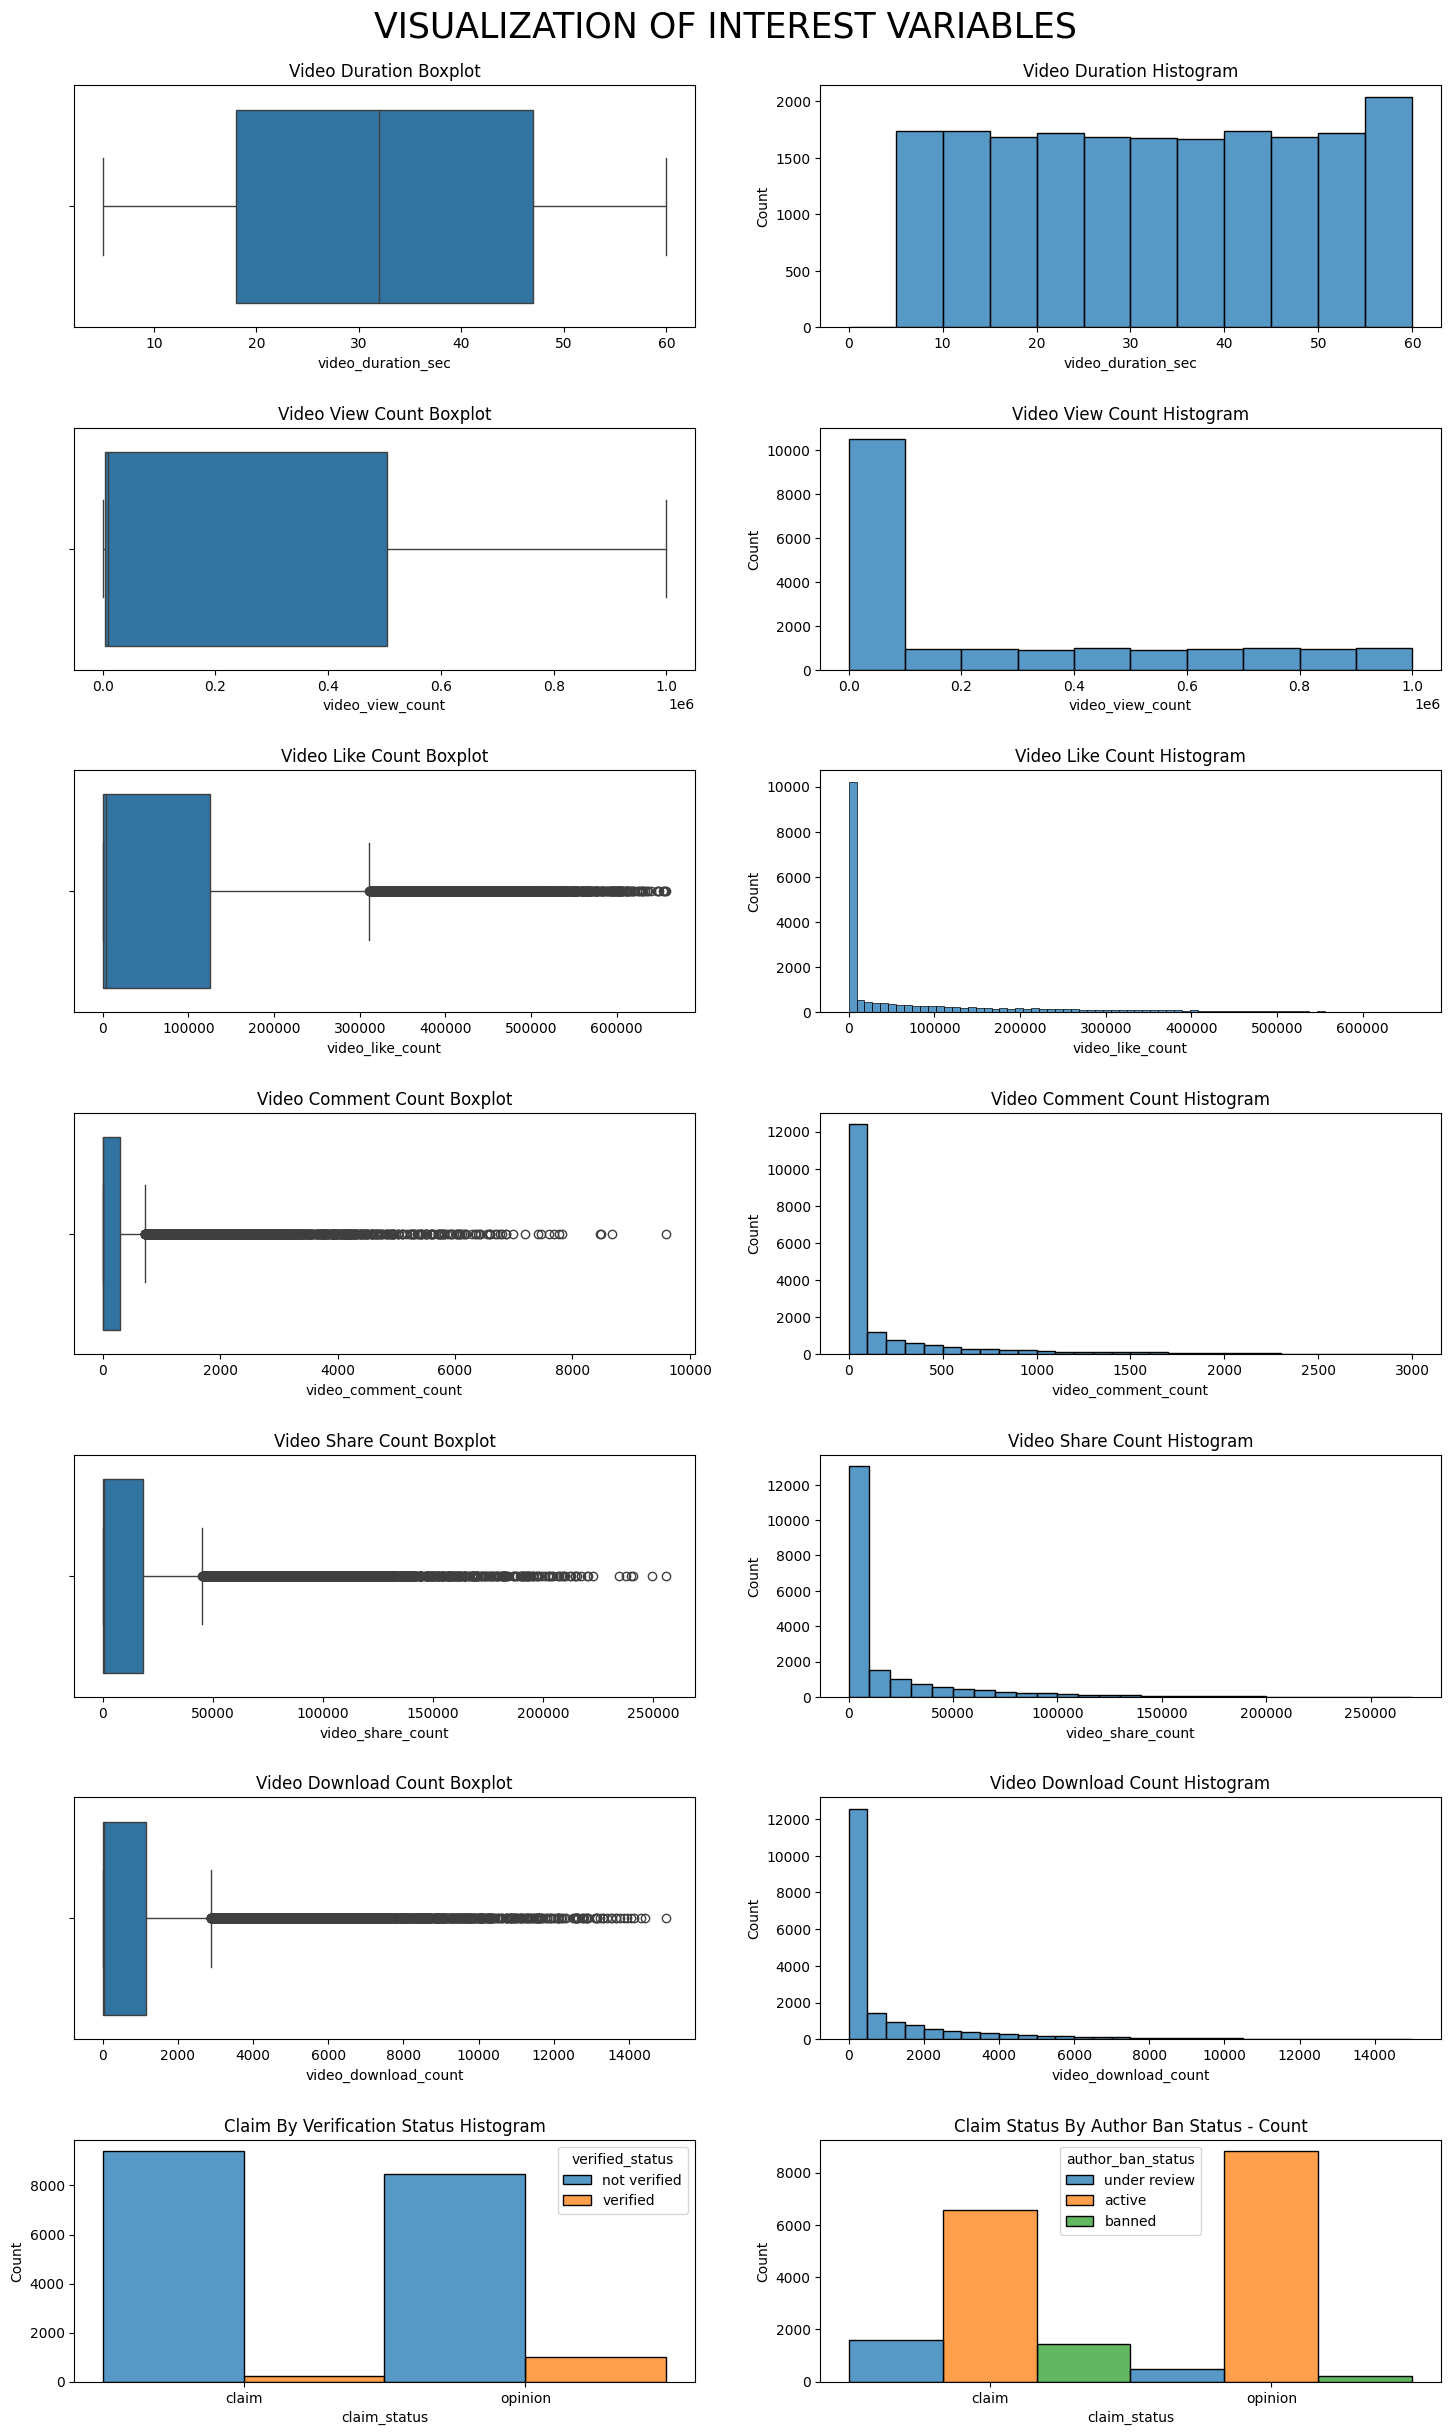

In [5]:
#Setting up subplots
fig, axs = plt.subplots(7,2, figsize=(15,25))
fig.suptitle('VISUALIZATION OF INTEREST VARIABLES', fontsize=25)

#Generating Visualizations
sns.boxplot(x=df['video_duration_sec'], ax=axs[0,0])
sns.boxplot(x=df['video_view_count'], ax=axs[1,0])
sns.boxplot(x=df['video_like_count'], ax=axs[2,0])
sns.boxplot(x=df['video_comment_count'], ax=axs[3,0])
sns.boxplot(x=df['video_share_count'], ax=axs[4,0])
sns.boxplot(x=df['video_download_count'], ax=axs[5,0])
sns.histplot(df['video_duration_sec'], bins=range(0,61,5), ax=axs[0,1])
sns.histplot(df['video_view_count'], bins=range(0,(10**6+1),10**5), ax=axs[1,1])
sns.histplot(df['video_like_count'], ax=axs[2,1])
sns.histplot(df['video_comment_count'], bins=range(0,(3001),100), ax=axs[3,1])
sns.histplot(df['video_share_count'], bins=range(0,(270001),10000), ax=axs[4,1])
sns.histplot(df['video_download_count'], bins=range(0,(15001),500), ax=axs[5,1])
sns.histplot(data=df, x='claim_status', hue='verified_status', multiple='dodge', ax=axs[6,0])
sns.histplot(data=df, x='claim_status', hue='author_ban_status', multiple='dodge', ax=axs[6,1])

#Labeling visualizations
axs[0,0].set_title('Video Duration Boxplot')
axs[0,1].set_title('Video Duration Histogram')
axs[1,0].set_title('Video View Count Boxplot')
axs[1,1].set_title('Video View Count Histogram')
axs[2,0].set_title('Video Like Count Boxplot')
axs[2,1].set_title('Video Like Count Histogram')
axs[3,0].set_title('Video Comment Count Boxplot')
axs[3,1].set_title('Video Comment Count Histogram')
axs[4,0].set_title('Video Share Count Boxplot')
axs[4,1].set_title('Video Share Count Histogram')
axs[5,0].set_title('Video Download Count Boxplot')
axs[5,1].set_title('Video Download Count Histogram')
axs[6,0].set_title('Claim By Verification Status Histogram')
axs[6,1].set_title('Claim Status By Author Ban Status - Count')
plt.tight_layout(pad=2.5)

## <u>FIRST OBJECTIVE</u>
Conduct A Two Sample T-Test On The Relationship Between The Video View Counts Of Verified And Not Verified Users

In [6]:
#Generating average video view count of verified and not verified users
round(df.groupby('verified_status')[['video_view_count']].mean(),0)

,video_view_count
verified_status,
not verified,265664.0
verified,91439.0


### HYPOTHESIS
**NULL HUPOTHESIS:** There is *no* difference in the number of views between videos posted by *verified* and  *unverified* accounts  

**ALTERNATE HYPOTHESIS:** There is *a* difference in the number of views between videos posted by *verified* and *unverified* accounts

In [7]:
#Defining samples
not_ver = df[df['verified_status'] == 'not verified']['video_view_count']
ver = df[df['verified_status'] == 'verified']['video_view_count']

#Conducting test
stat, pvalue = stats.ttest_ind(a=not_ver, b=ver, equal_var=False)
print('The p-value is {:.136f} which is extremely small, much smaller than 0.05 .Hence the null hypothesis is rejected'.
      format(pvalue))

The p-value is 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000026088823687177823 which is extremely small, much smaller than 0.05 .Hence the null hypothesis is rejected


### CONCLUSION
There Is A Statistically Significant Difference In The Average View Counts Between Videos From Verified Accounts And  Unverified Accounts

## <u>SECOND OBJECTIVE</u>
Build A Regression Model To Analyze User Behavior Within Verified Users
1. [X] Outlier Detection and Imputation
2. [X] Balance Classes In Outcome Variable
3. [X] Compute Correlation Between Interest Variables With Visual Aid
4. [X] Engineer A Logistic Regression Model, Complete With Evaluation Metrics Confusion Matrix And Model Coefficients

### OUTLIER DETECTION AND IMPUTATION

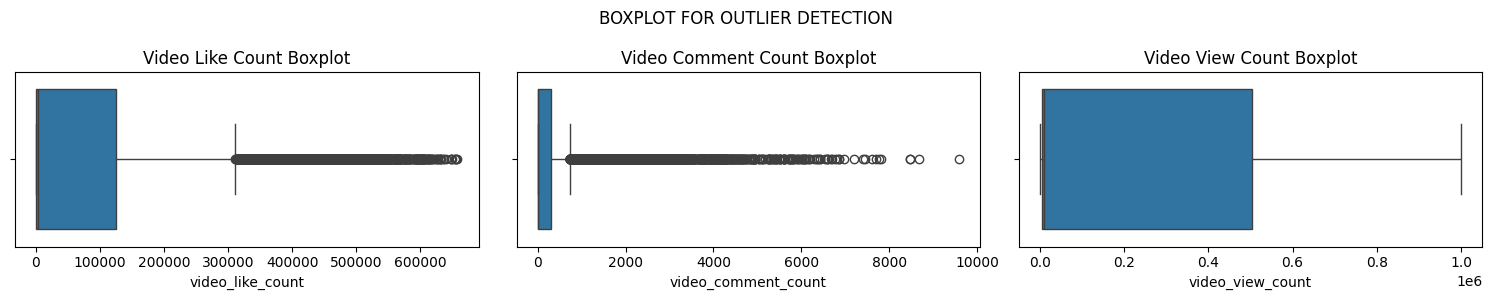

In [8]:
#Generating boxplots for outlier detection in interest variables
fig, axs = plt.subplots(1,3, figsize=(15,3))
fig.suptitle('BOXPLOT FOR OUTLIER DETECTION')

#Generating Visualizations
sns.boxplot(x=df['video_like_count'], ax=axs[0])
sns.boxplot(x=df['video_comment_count'], ax=axs[1])
sns.boxplot(x=df['video_view_count'], ax=axs[2])

#Labeling visualizations
axs[0].set_title('Video Like Count Boxplot')
axs[1].set_title('Video Comment Count Boxplot')
axs[2].set_title('Video View Count Boxplot')
plt.tight_layout(pad=1)

In [9]:
#Imputing Outliers
for i in ["video_like_count", "video_comment_count"]:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_limit = df[i].quantile(0.75) + 1.5 * iqr
    df.loc[df[i] > upper_limit, i ] = upper_limit
    print(f"{i} outliers imputed")

video_like_count outliers imputed
video_comment_count outliers imputed


### CLASS BALANCING

In [10]:
#Checking class balance
df['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

In [11]:
#Defining minority and majority classes
majority = df[df["verified_status"] == "not verified"]
minority = df[df["verified_status"] == "verified"]

#Upsampling minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

#Combining minority_ sampled and majority
dfsam = pd.concat([majority, minority_upsampled]).reset_index(drop=True)

#Checking class balance
dfsam['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64

### CORRELATION MATRIX

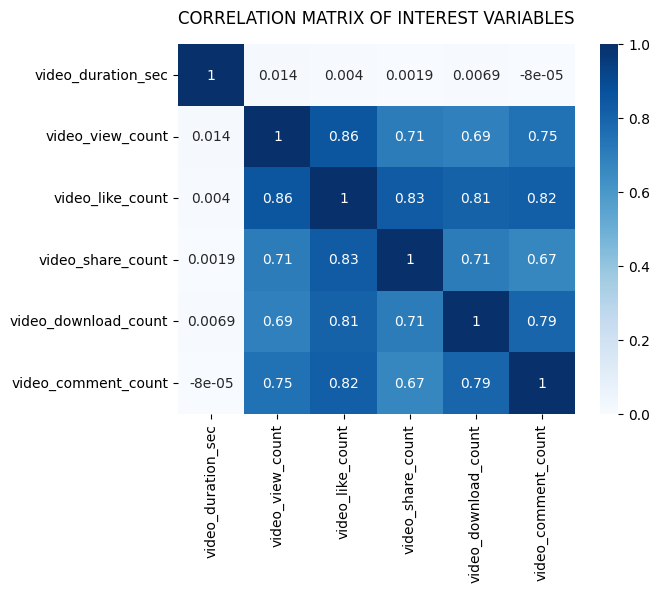

In [12]:
#Correlation matrix of interest variables
plt.title('CORRELATION MATRIX OF INTEREST VARIABLES', pad=15)

#Generating Visualizations
sns.heatmap(dfsam[["video_duration_sec", "claim_status", "author_ban_status","video_view_count", "video_like_count",
                   "video_share_count", "video_download_count", "video_comment_count"]].
            corr(numeric_only=True),
            annot=True,
            cmap='Blues')
plt.show()

### LOGISTIC REGRESSION MODEL

In [13]:
#Dropping unnecessary variables
dfmod = dfsam.drop(columns=dfsam[["#", "video_id","video_transcription_text","video_like_count"]])

#Define X and y variables
y = dfmod["verified_status"]
X = dfmod.drop(columns=["verified_status"])

#Defining training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=42)

#Generating dataframe for split
split = pd.DataFrame(data={"Dimensions":[X_train.shape,
                                         X_test.shape, 
                                         y_train.size, 
                                         y_test.size]},
                     index=["X Train","X Test","Y Train","Y Test"])

#Previewing split
split

,Dimensions
X Train,"(26826, 7)"
X Test,"(8942, 7)"
Y Train,26826
Y Test,8942


### ONE HOT ENCODING TRAINING & TESTING SETS

In [14]:
#Applying one hot encoder to x_train
data = X_train[["claim_status", "author_ban_status"]] #Defining values to be encoded
encoder = OneHotEncoder(drop='first',sparse_output=False) #Defining encoder
encoded_data = encoder.fit_transform(data) #Applying encoder
new_data = pd.DataFrame(data=encoded_data ,columns=encoder.get_feature_names_out()) #Generating a dataframe out of encoded data
X_train = X_train.drop(columns=["claim_status","author_ban_status"]).reset_index(drop=True) #Dropping encoded variables from original data
X_train_en = pd.concat([X_train, new_data], axis=1) #Adding encoded data to edited original dataframe

#Applying one hot encoder to x_test
data = X_test[["claim_status", "author_ban_status"]] #Defining values to be encoded
encoder = OneHotEncoder(drop='first', sparse_output=False) #Defining encoder
encoded_data = encoder.fit_transform(data) #Applying encoder
new_data = pd.DataFrame(data=encoded_data ,columns=encoder.get_feature_names_out()) #Generating a dataframe out of encoded data
X_test = X_test.drop(columns=["claim_status","author_ban_status"]).reset_index(drop=True) #Dropping encoded variables from original data
X_test_en = pd.concat([X_test, new_data], axis=1) #Adding encoded data to edited original dataframe

In [15]:
#Applying one hot encoder to y_train
encoder = OneHotEncoder(drop='first', sparse_output=False) #Defining encoder
y_train_en = encoder.fit_transform(y_train.values.reshape(-1,1)).ravel() #Applying encoder

#Applying one hot encoder to y_test
encoder = OneHotEncoder(drop='first', sparse_output=False) #Defining encoder
y_test_en = encoder.fit_transform(y_test.values.reshape(-1,1)).ravel() #Applying encoder

In [16]:
#Generating dataframe for split
split_en = pd.DataFrame(data={"Dimensions":[X_train_en.shape, 
                                            X_test_en.shape, 
                                            y_train_en.size, 
                                            y_test_en.size]},
                     index=["X Train Encoded","X Test Encoded","Y Train Encoded","Y Test Encoded"])

#Previewing split
split_en

,Dimensions
X Train Encoded,"(26826, 8)"
X Test Encoded,"(8942, 8)"
Y Train Encoded,26826
Y Test Encoded,8942


In [17]:
#Defining and fiting logostic regression model
log_mod = LogisticRegression(random_state=42, max_iter=800).fit(X_train_en,y_train_en)

#Generating Preictions
y_pred = log_mod.predict(X_test_en)

### EVALUATION METRICS, CONFUSION MATRIX AND MODEL COEFFICIENTS

In [18]:
#Generating dataframe for results
results = pd.DataFrame(data={"Accuracy":f"{round((accuracy_score(y_test_en, y_pred)*100),0)} %",
                            "Precision":f"{round((precision_score(y_test_en, y_pred)*100),0)} %",
                            "Recall":f"{round((recall_score(y_test_en, y_pred)*100),0)} %",
                            "F1 Score":f"{round((f1_score(y_test_en, y_pred)*100),0)} %",
                            "ROC AUC":f"{round((roc_auc_score(y_test_en, y_pred)*100),0)} %"},
                      index=["LOGISTIC REGRESSION"])
#Previewing results
results

,Accuracy,Precision,Recall,F1 Score,ROC AUC
LOGISTIC REGRESSION,69.0 %,65.0 %,84.0 %,73.0 %,68.0 %


In [19]:
#Creating a dataframe for model coefficients
coeff = pd.DataFrame(data={"Feature Name": log_mod.feature_names_in_ ,"Model Coefficients":log_mod.coef_[0]})
coeff["Actual Coefficients"] = coeff["Model Coefficients"].apply(lambda x:format(x,'4f'))
coeff = coeff.sort_values(by=["Model Coefficients"], ascending=False, ignore_index=True)
coeff

,Feature Name,Model Coefficients,Actual Coefficients
0,claim_status_opinion,1.682388e+00,1.682388
1,video_comment_count,5.235879e-04,0.000524
2,video_share_count,5.098049e-06,0.000005
3,video_view_count,-1.807632e-07,-0.000000
4,video_download_count,-1.080282e-04,-0.000108
5,video_duration_sec,-8.610645e-04,-0.000861
6,author_ban_status_under review,-1.259531e-01,-0.125953
7,author_ban_status_banned,-3.795303e-01,-0.379530


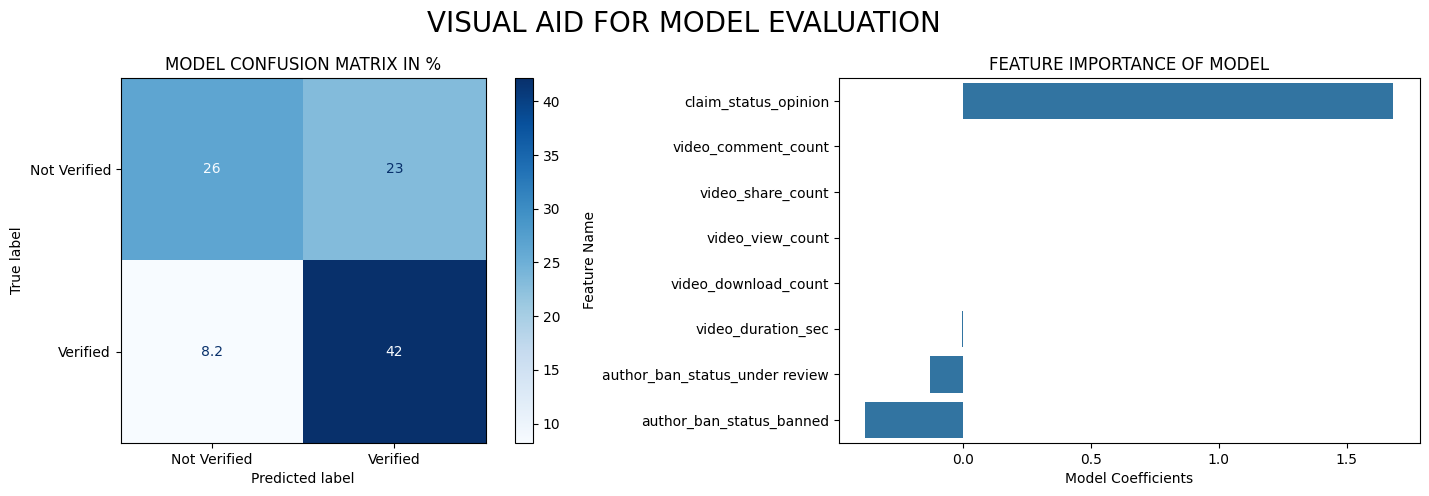

In [20]:
# Ploting model coefficients
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.suptitle("VISUAL AID FOR MODEL EVALUATION", fontsize=20)

#Generating confusion matric display of model
ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix(y_test_en, y_pred, normalize="all")*100,
    display_labels = ["Not Verified","Verified"]).plot(cmap='Blues', ax=ax[0])

#Generating barplot of model coefficients
sns.barplot(data=coeff, 
            x='Model Coefficients', 
            y='Feature Name', 
            orient='h', 
            ax=ax[1])

#Labeling visualizations
ax[0].set_title("MODEL CONFUSION MATRIX IN %")
ax[1].set_title("FEATURE IMPORTANCE OF MODEL")
plt.tight_layout(pad=1)

## <u>THIRD OBJECTIVE</u>  
Develop a Classification Model To Distinguish Between Claims And Opinions Within Comments And Videos
- [X] Generate a text length column from `video_transcription_text`

### FEATURE ENGINEERING

In [21]:
#Generating copy of dataframe
df1 = df.copy()

#Generating text length column
df1['text_length'] = df1['video_transcription_text'].str.len()

#Dropping columns
df1.drop(columns=['#', 'video_id','video_transcription_text'], axis=1, inplace=True)

In [22]:
#Converting categorical variables into binary values
df1 = pd.get_dummies(df1, columns=['claim_status', 'verified_status', 'author_ban_status'], drop_first=True)
df1.head(3)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,claim_status_opinion,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False,False


### MODEL PREP

In [23]:
#Define X and y variables
y = df1["claim_status_opinion"]
X = df1.drop(columns=["claim_status_opinion"])

#Defining training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

#Generating dataframe for split
split2 = pd.DataFrame(data={"Dimensions":[X_train.shape,
                                          X_test.shape, 
                                          y_train.size, 
                                          y_test.size]}, 
                      index=["X Train", "X Test", "Y Train", "Y Test"])

#Previewing split
split2

,Dimensions
X Train,"(15267, 10)"
X Test,"(3817, 10)"
Y Train,15267
Y Test,3817


### CLASSIFICATION MODELS

In [24]:
# Initialize empty lists to store results
Model = []
Accuracy = []
Precision = []
F1 = []
Recall = []
ROC_AUC = []

# Generating function to store and display results
def resultify(name_or_results, test=None, pred=None):
    """
    Processes results if test and pred are provided, 
    or displays results if passed with no additional arguments.
    """
    
    # If called with no test/pred arguments, display the results DataFrame
    if test is None and pred is None:
        return pd.DataFrame(
            data={'Accuracy': Accuracy,
                  'Precision': Precision,
                  'Recall': Recall,
                  'F1': F1,
                  'ROC AUC': ROC_AUC},
            index=Model
        )
    
    # Ensure all required arguments are provided for result processing
    if not (test is None or pred is None):
        # Generate evaluation scores
        accuracy_value = round(accuracy_score(test, pred) * 100, 0)
        precision_value = round(precision_score(test, pred) * 100, 0)
        recall_value = round(recall_score(test, pred) * 100, 0)
        f1_value = round(f1_score(test, pred) * 100, 0)
        roc_auc_value = round(roc_auc_score(test, pred) * 100, 0)
        
        # Append values to lists
        Model.append(name_or_results)
        Accuracy.append(f"{accuracy_value}%")
        Precision.append(f"{precision_value}%")
        Recall.append(f"{recall_value}%")
        F1.append(f"{f1_value}%")
        ROC_AUC.append(f"{roc_auc_value}%")

### INITIALIZING CLASSIFIERS 

In [25]:
#Initializing first base classifier
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train) #Training first classifier

#Initializing second base classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train) #Training second classifier

#Initializing third base classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42).fit(X_train, y_train) #Training third classifier

print("BASE CLASSIFIERS READY")

BASE CLASSIFIERS READY


### PREDICTIONS

In [26]:
#Generating predictions
rfc_pred = rfc.predict(X_test)
resultify("RANDOM FOREST Val", y_test, rfc_pred) #Applying resultify

#Generating predictions
gbc_pred = gbc.predict(X_test)
resultify("GRADIENT BOOSTING Val", y_test, gbc_pred) #Applying resultify

#Generating predictions
xgb_pred = xgb.predict(X_test)
resultify("X GRADIENT BOOSTING Val", y_test, xgb_pred) #Applying resultify

### MODELS' RESULTS

In [27]:
#Displaying results
resultify('results')

,Accuracy,Precision,Recall,F1,ROC AUC
RANDOM FOREST Val,99.0%,99.0%,100.0%,99.0%,99.0%
GRADIENT BOOSTING Val,100.0%,99.0%,100.0%,99.0%,100.0%
X GRADIENT BOOSTING Val,99.0%,99.0%,100.0%,99.0%,99.0%


### CONFUSION MATRICES

In [28]:
#Defining validation confusion matricies 
rfc_cm = confusion_matrix(y_test, rfc_pred, normalize="all")*100
gbc_cm = confusion_matrix(y_test, gbc_pred, normalize="all")*100
xgb_cm = confusion_matrix(y_test, xgb_pred, normalize="all")*100

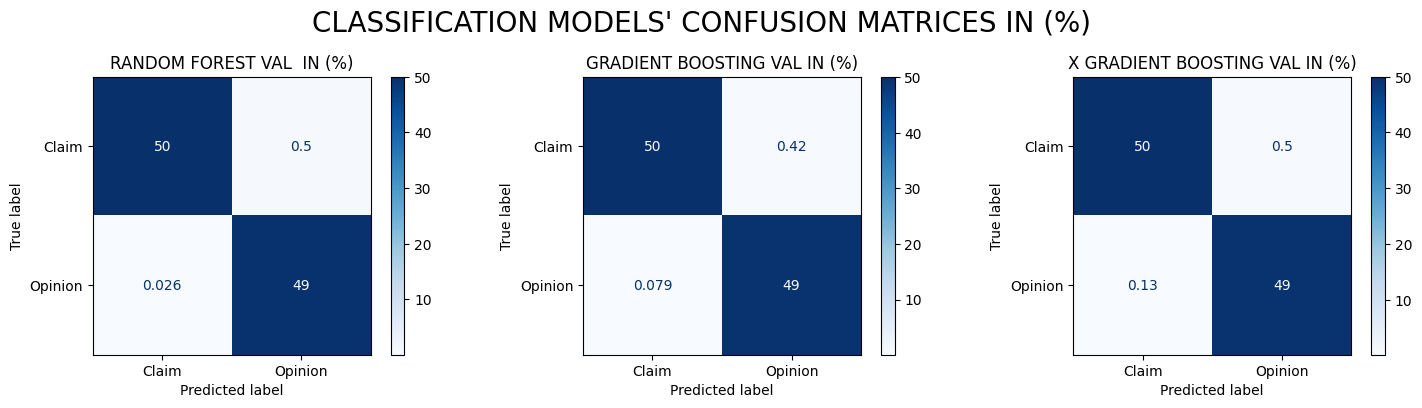

In [29]:
#Generating subplots
fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle("CLASSIFICATION MODELS' CONFUSION MATRICES IN (%)", fontsize=20)

#Generating Visualizations
ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=['Claim', 'Opinion']).plot(cmap='Blues', ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=['Claim', 'Opinion']).plot(cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['Claim', 'Opinion']).plot(cmap='Blues', ax=ax[2])

#Labelling subplots
ax[0].set_title("RANDOM FOREST VAL  IN (%)")
ax[1].set_title("GRADIENT BOOSTING VAL IN (%)")
ax[2].set_title("X GRADIENT BOOSTING VAL IN (%)")
plt.tight_layout(pad=1.5)

### FEATURE IMPORTANCE

In [30]:
# List of models and their names
models = [rfc, gbc, xgb]
model_names = ['rfc', 'gbc', 'xgb']

# Initialize an empty list to store the dataframes
dfs = []

In [31]:
# Loop through each model
for model, name in zip(models, model_names):
    # Get feature importances and indices
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Generate dataframe for feature importances
    df = pd.DataFrame(
        data={'Feature': [X.columns[i] for i in indices],
              'Importance': importances[indices]})
    
    # Append the dataframe to the list
    dfs.append(df)

In [32]:
# Assign the dataframes to variables
rfc_df, gbc_df, xgb_df = dfs

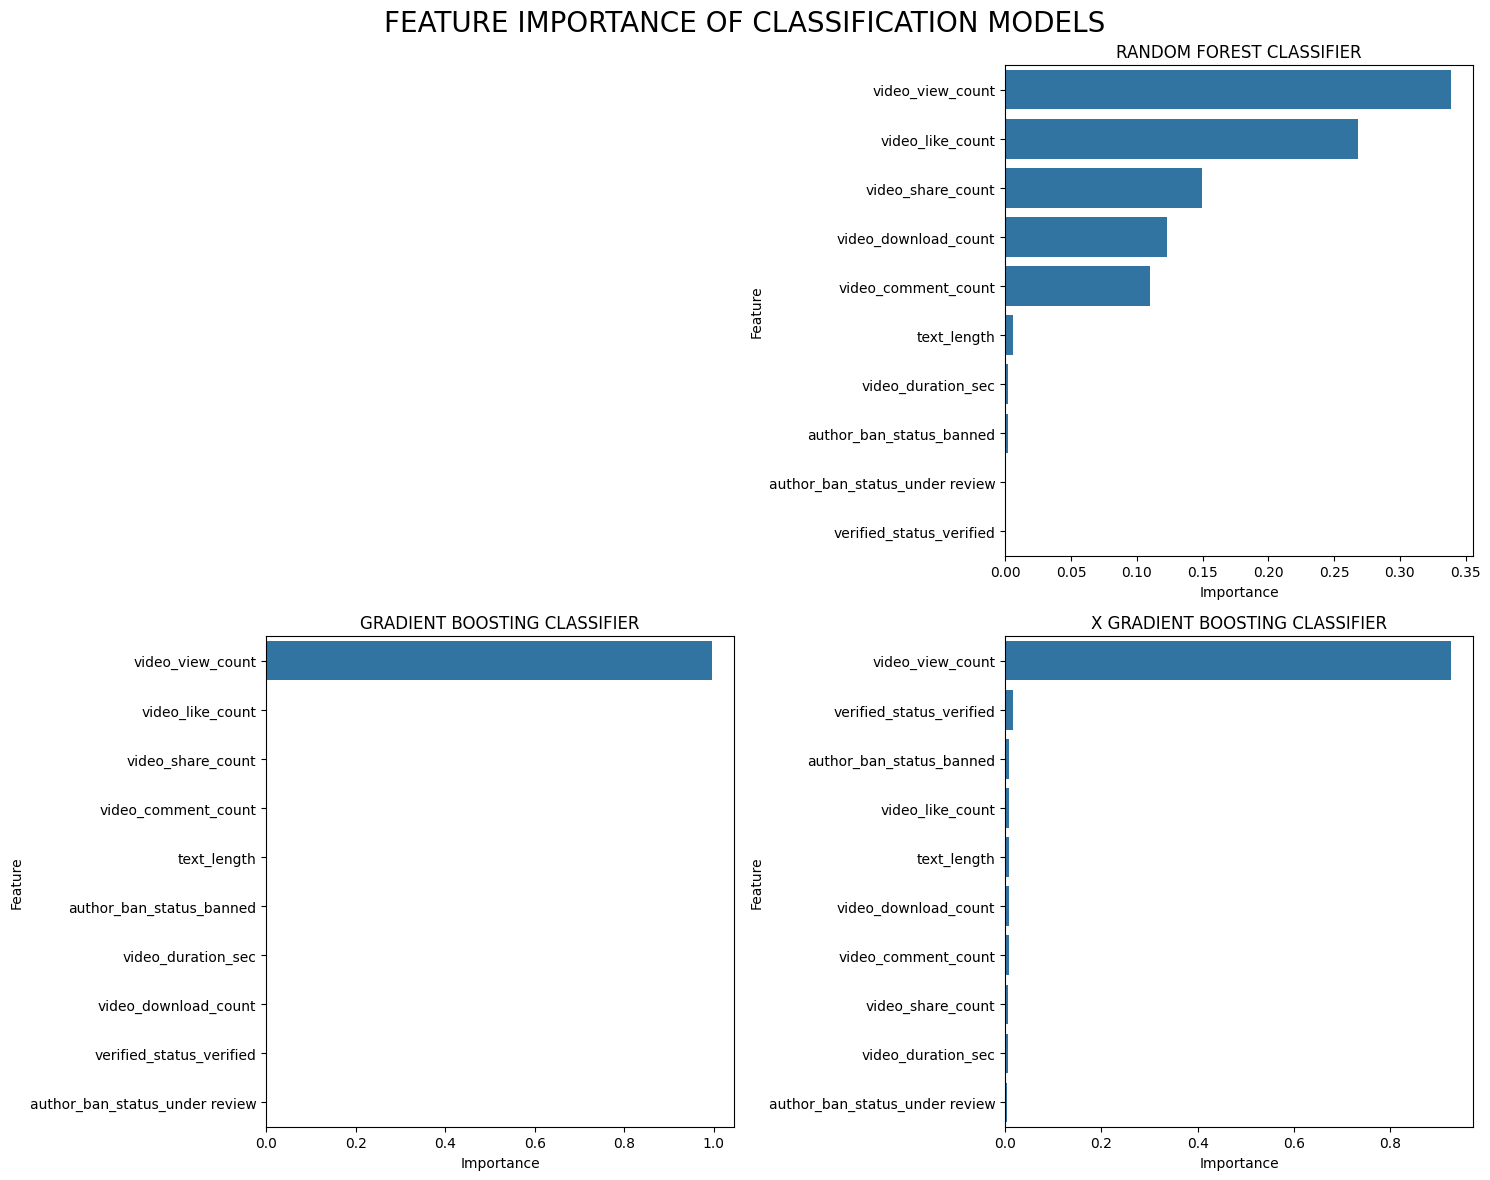

In [33]:
#Generating subplots
fig, ax = plt.subplots(2,2, figsize=(15,12))
plt.suptitle("FEATURE IMPORTANCE OF CLASSIFICATION MODELS", fontsize=20)

#Disabling axis
ax[0,0].axis('off')

#Generating vusializations
sns.barplot(data=rfc_df, y='Feature', x='Importance', ax=ax[0,1]) #orient='h'
sns.barplot(data=gbc_df, y='Feature', x='Importance', ax=ax[1,0])
sns.barplot(data=xgb_df, y='Feature', x='Importance', ax=ax[1,1])

#Naming subplots
ax[0,1].set_title("RANDOM FOREST CLASSIFIER")
ax[1,0].set_title("GRADIENT BOOSTING CLASSIFIER")
ax[1,1].set_title("X GRADIENT BOOSTING CLASSIFIER")
plt.tight_layout()